In [1]:
#import lux
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LinearRegression
#from sklearn.multioutput import MultiOutputClassifier



In [2]:
data = pd.read_csv('ComputerSmartDevice_for_ml.csv')

In [3]:
data.head()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,purchase_year,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status
0,[not completed],Senior,NaN,Computer Science,Male,African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
1,[not completed],Freshman,NaN,Chemistry,Male,African American,NaN,Laptop,NaN,14'',NaN,3 year,External,Good,NaN,University property,Windows OS,NaN,NaN,16 GB,1 TB,NaN,Yes,Both,WD,Google Drive,Weekly,Yes,No,Yes,No,NaN,Google,NaN,NaN,Fitbit,NaN,NaN,NaN,NaN,Incomplete
2,6/15/2020 17:36,Doctoral Student (PhD),NaN,Computer Science,Male,International (visa holders),NaN,Laptop,NaN,14'',NaN,1 year,Built-in to my computer,Good,NaN,University property,Chrome OS,NaN,NaN,16 GB,512 GB,NaN,Yes,Both,WD,Google Drive,Daily,Yes,No,Yes,No,NaN,Samsung,NaN,NaN,Samsung,NaN,Neutral,NaN,Average,Complete
3,6/16/2020 8:34,Freshman,NaN,Biology and Biochemistry,Male,White,NaN,Laptop,NaN,15'',NaN,3 year,Built-in to my computer,Average,NaN,University property,Mac OS,NaN,NaN,4 GB,128 GB,NaN,Yes,Cloud,NaN,Microsoft OneDrive,Weekly,Yes,Yes,Yes,Yes,NaN,Samsung,NaN,NaN,Samsung,NaN,Somewhat confident,NaN,Average,Complete
4,6/16/2020 10:41,Senior,NaN,Computer Science,Male,International (visa holders),NaN,Laptop,NaN,14'',NaN,1 year,Built-in to my computer,Average,NaN,Own,Windows OS,NaN,NaN,16 GB,512 GB,NaN,Yes,Both,WD,Microsoft OneDrive,Weekly,Yes,Yes,Yes,No,NaN,Google,NaN,NaN,Samsung,NaN,Neutral,NaN,Average,Complete


In [4]:
data.describe()

,purchase_year
count,1397.000000
mean,2017.257695
std,2.257942
min,2010.000000
25%,2016.000000
50%,2018.000000
75%,2019.000000
max,2020.000000


In [5]:
data_purch_drop = data.drop('purchase_year', axis = 1)

In [6]:
data_purch_drop.describe()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status
count,1573,1562,1017,1557,1561,1561,1546,1403,1399,164,1398,1397,1399,1396,1400,1359,1354,1107,1105,1102,1101,1073,534,232,405,534,534,1073,1073,468,1059,1050,1047,1059,323,319,1046,1042,1045,1573
unique,717,17,2,20,5,10,2,3,5,84,8,3,5,11,3,7,29,5,5,5,4,2,3,4,5,4,2,2,2,2,2,4,74,2,4,11,5,4,5,2
top,[not completed],Freshman,College of Liberal Arts and Social Sciences,Biology and Biochemistry,Female,White,Standard User [document writing/email/web],Laptop,13'',"11""",No,Built-in to my computer,Good,Other,Own,Windows OS,Windows 10 Home,Intel Core i5,8 GB,128 GB,100 GB - 500 GB,No,Cloud,WD,Apple iCloud,Daily,Yes,No,No,No,Yes,iPhone,iPhone X Series,No,Apple Watch,Apple Watch 3,Moderately confident,100 - 300 Mbps,Good,Complete
freq,530,361,851,318,1018,436,1272,1190,592,14,988,1198,530,557,1269,680,545,425,435,392,556,539,295,81,159,151,303,918,605,314,1047,770,249,740,245,119,260,369,381,1043


# Dropping null values

In [7]:
data_1 = data_purch_drop.dropna(subset= ['participant_class'])
#'department', 'race','computer_user_type', 'computer_model','computer_ownership', 'os', 'os_version', 'processor', 'memory','harddisk'

In [8]:
data_1 = data_1.dropna(subset= ['department'])

In [9]:
data_1 = data_1.dropna(subset= ['race'])

In [10]:
data_1 = data_1.dropna(subset= ['computer_user_type'])

In [11]:
data_1 = data_1.dropna(subset= ['computer_model'])

In [12]:
data_1 = data_1.dropna(subset= ['computer_ownership'])

In [13]:
data_1 = data_1.dropna(subset= ['os'])

In [14]:
data_1 = data_1.dropna(subset= ['os_version'])

In [15]:
data_1 = data_1.dropna(subset= ['processor'])

In [16]:
data_1 = data_1.dropna(subset= ['memory'])

In [17]:
data_1 = data_1.dropna(subset= ['harddisk'])

In [18]:
data_1.describe()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status
count,1088,1088,717,1088,1088,1088,1088,1088,1088,132,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1088,1061,524,224,396,524,524,1061,1061,460,1051,1040,1041,1051,315,315,1036,1035,1035,1088
unique,707,16,2,20,5,10,2,3,5,70,8,3,5,11,3,7,25,5,5,5,4,2,3,4,5,4,2,2,2,2,2,4,74,2,4,11,5,4,5,2
top,[not completed],Senior,College of Liberal Arts and Social Sciences,Biology and Biochemistry,Female,White,Standard User [document writing/email/web],Laptop,13'',"27""",No,Built-in to my computer,Good,Other,Own,Windows OS,Windows 10 Home,Intel Core i5,8 GB,128 GB,100 GB - 500 GB,No,Cloud,Seagate,Apple iCloud,Daily,Yes,No,No,No,Yes,iPhone,iPhone X Series,No,Apple Watch,Apple Watch 3,Moderately confident,100 - 300 Mbps,Good,Complete
freq,55,247,586,209,670,324,853,920,469,10,762,934,413,442,978,556,441,421,432,390,547,537,293,75,159,148,294,909,601,307,1041,767,249,736,243,119,260,366,379,1033


In [19]:
data_1.isna().sum()

survey_timestamp                         0
participant_class                        0
college                                371
department                               0
Gender                                   0
race                                     0
computer_user_type                       0
pc/laptop                                0
screen_size                              0
screen_size_other                      956
warranty                                 0
webcam                                   0
computer_rating                          0
computer_model                           0
computer_ownership                       0
os                                       0
os_version                               0
processor                                0
memory                                   0
harddisk                                 0
data_sizein_computer                     0
data_backup                             27
backup_method                          564
external_ba

# EDA

In [20]:
data_1.groupby('race').os.count().sort_values(ascending = False)

race
White                           324
Hispanic                        283
Asian American                  222
African American                 94
International (visa holders)     60
Prefer Not to Say                47
Multiracial                      32
Other                            23
Hawaiian/Pacific Islander         2
Native American                   1
Name: os, dtype: int64

In [21]:
data_1.os.value_counts()
labels=data_1.os.unique()
labels

array(['Mac OS', 'Windows OS', 'Linux', 'Chrome OS', 'Other',
       'Windows OS, Linux', 'Mac OS, Windows OS, Linux'], dtype=object)

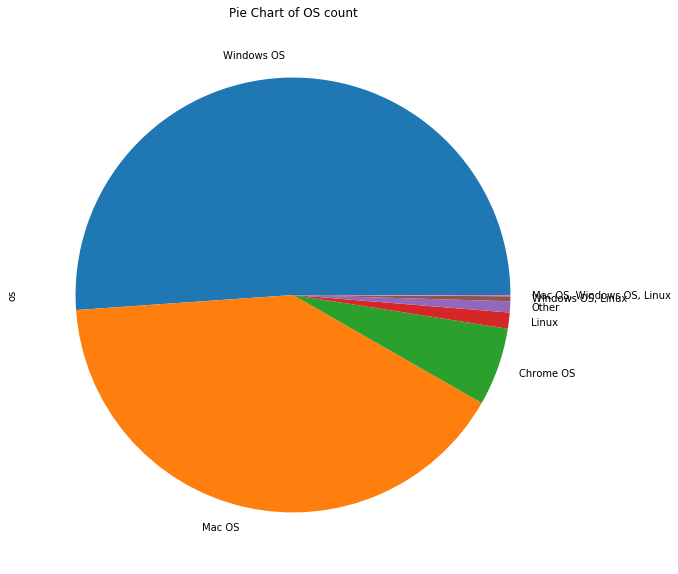

In [22]:
plt.figure(figsize=(10,10))
data_1.os.value_counts().plot(kind = 'pie')
plt.title('Pie Chart of OS count')
plt.show()

In [23]:
race_os = data_1.groupby('race').os.value_counts()
print(race_os)

race                          os                       
African American              Windows OS                    45
                              Mac OS                        44
                              Chrome OS                      5
Asian American                Windows OS                   133
                              Mac OS                        73
                              Chrome OS                     13
                              Linux                          2
                              Windows OS, Linux              1
Hawaiian/Pacific Islander     Chrome OS                      1
                              Windows OS                     1
Hispanic                      Windows OS                   132
                              Mac OS                       119
                              Chrome OS                     25
                              Other                          6
                              Windows OS, Linux              1

In [24]:
df = data_1[data_1.os == 'Mac OS'].reset_index()
df.drop('index', inplace= True, axis= 1)

race
White                           144
Hispanic                        119
Asian American                   73
African American                 44
International (visa holders)     24
Prefer Not to Say                18
Other                            12
Multiracial                       8
Name: os, dtype: int64


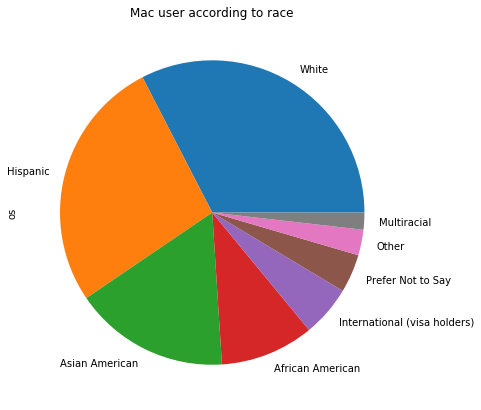

In [25]:
race_mac = df.groupby('race').os.count().sort_values(ascending = False)
print(race_mac)

plt.figure(figsize=(7,7))
race_mac.plot.pie()
plt.title('Mac user according to race')
plt.show()

In [26]:
data_1.head()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status
14,6/18/2020 10:26,Instructional Faculty,NaN,Earth and Atmospheric Sciences,Prefer Not to Say,Prefer Not to Say,Standard User [document writing/email/web],Desktop,14'',NaN,No,Built-in to my computer,Average,Apple Macbook Pro,Own,Mac OS,High Sierra,Intel Core i5,4 GB,256 GB,100 GB - 500 GB,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone 8,No,NaN,NaN,Neutral,100 - 300 Mbps,Average,Complete
15,6/19/2020 14:42,Senior,NaN,Computer Science,Male,International (visa holders),Power User [... plus programming/analytics],Laptop,15'',NaN,No,Built-in to my computer,Average,Dell Inspiron 5000,Own,Windows OS,Windows 10 Home,Intel Core i7,16 GB,512 GB,100 GB - 500 GB,Yes,Both,WD,Google Drive,Weekly,Yes,No,Yes,No,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Neutral,< 100 Mbps,Good,Complete
16,6/22/2020 12:09,Senior,NaN,Computer Science,Female,International (visa holders),Power User [... plus programming/analytics],Laptop,15'',NaN,3 year,Built-in to my computer,Excellent,Other,Own,Windows OS,Windows 10 Home,Intel Core i5,8 GB,256 GB,100 GB - 500 GB,Yes,Cloud,NaN,Microsoft OneDrive,Other,Yes,Yes,Yes,Yes,Yes,iPhone,iPhone X Series,No,NaN,NaN,Moderately confident,300 - 500 Mbps,Excellent,Complete
17,6/22/2020 12:09,Masters Student (MS),NaN,Computer Science,Male,International (visa holders),Power User [... plus programming/analytics],Laptop,15'',NaN,No,Built-in to my computer,Good,Other,Own,Linux,Other,Intel Core i7,8 GB,> 1 TB,500 GB - 1 TB,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,Google,Google Pixel 3a,No,NaN,NaN,Very confident,300 - 500 Mbps,Excellent,Complete
18,6/22/2020 12:08,Senior,NaN,Biology and Biochemistry,Female,Asian American,Standard User [document writing/email/web],Laptop,13'',NaN,No,Built-in to my computer,Good,Apple Macbook Air,Own,Mac OS,Catalina,Intel Core i5,8 GB,128 GB,500 GB - 1 TB,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Somewhat confident,100 - 300 Mbps,Average,Complete


# Conversion to numeric for each column

In [27]:
data_1.Gender.unique()

array(['Prefer Not to Say', 'Male', 'Female', 'Transgender',
       'Non-binary/non-conforming'], dtype=object)

In [28]:
data_1['Gender'] = data_1['Gender'].replace(['Non-binary/non-conforming', 'Prefer Not to Say', 'Transgender', 'Male', 'Female'],
                                            [1,2,3,4,5])

In [29]:
data_1.participant_class.unique()

array(['Instructional Faculty', 'Senior', 'Masters Student (MS)',
       'Doctoral Student (PhD)', 'Sophomore', 'Freshman', 'Junior',
       'Post-Baccalaureate (second degree)',
       'Post-Baccalaureate (non-degree option)', 'Assistant Professor',
       'Staff', 'Associate Professor', 'Postdoctoral', 'Research Faculty',
       'Professor', 'Lecturer'], dtype=object)

In [30]:
data_1['participant_class'] = data_1['participant_class'].replace(['Freshman', 'Sophomore', 'Junior', 'Senior', 'Post-Baccalaureate (non-degree option)',
                                                                   'Post-Baccalaureate (second degree)','Masters Student (MS)', 'Doctoral Student (PhD)',
                                                                   'Postdoctoral', 'Staff', 'Instructional Faculty','Research Faculty','Lecturer', 
                                                                   'Assistant Professor','Associate Professor','Professor'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [31]:
data_1['department'] = data_1['department'].replace(['Other', 'Earth and Atmospheric Sciences','Computer Science', 'Biology and Biochemistry',
                                                     'Chemistry','Mathematics','Physics','Communication Sciences and Disorders',
                                                     'English','Health and Human Performance','Economics', 'History','Political Science',
                                                     'Psychology','Philosophy', 'Sociology','Hispanic Studies', 'Modern and Classical Languages',
                                                     'Comparative Cultural Studies', 'Jack J. Valenti School of Communication',
                                                     ],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

In [32]:
data_1.race.unique()

array(['Prefer Not to Say', 'International (visa holders)',
       'Asian American', 'White', 'African American', 'Hispanic',
       'Multiracial', 'Other', 'Hawaiian/Pacific Islander',
       'Native American'], dtype=object)

In [33]:
data_1['race'] = data_1['race'].replace(['International (visa holders)','Asian American', 'White', 'African American', 'Hispanic',
                                         'Multiracial', 'Other', 'Hawaiian/Pacific Islander','Native American','Prefer Not to Say'],
                                        [1,2,3,4,5,6,7,8,9,10])

In [34]:
data_1.computer_user_type.unique()

array(['Standard User [document writing/email/web]',
       'Power User [... plus programming/analytics]'], dtype=object)

In [35]:
data_1['computer_user_type'] = data_1['computer_user_type'].replace(['Standard User [document writing/email/web]',
                                                                     'Power User [... plus programming/analytics]'],[1,2])

In [36]:
data_1['pc/laptop'].unique()

array(['Desktop', 'Laptop', 'Tablet'], dtype=object)

In [37]:
data_1['pc/laptop'] = data_1['pc/laptop'].replace(['Tablet', 'Desktop', 'Laptop'],[1,2,3])

In [38]:
data_1['screen_size'].unique()

array(["14''", "15''", "13''", "17''", 'Other'], dtype=object)

In [39]:
data_1['screen_size'] = data_1['screen_size'].replace(["14''", "15''", "13''", "17''", 'Other'], [14,15,13,17,0])

In [40]:
data_1['computer_model'].unique()

array(['Apple Macbook Pro', 'Dell Inspiron 5000', 'Other',
       'Apple Macbook Air', 'Dell Latitude 5000', 'Dell Inspiron 7000',
       'Microsoft Surface', 'Lenovo ThinkPad', 'Lenovo Yoga',
       'Dell Inspiron 3000', 'Dell Latitude 7000'], dtype=object)

In [41]:
data_1['computer_ownership'].unique()

array(['Own', 'University property', 'Other'], dtype=object)

In [42]:
data_1['os'] = data_1.os.str.lower()
data_1['os'] = data_1.os.str.strip()

In [43]:
data_1['os'].unique()

array(['mac os', 'windows os', 'linux', 'chrome os', 'other',
       'windows os, linux', 'mac os, windows os, linux'], dtype=object)

In [44]:
data_1['os'] = data_1['os'].replace(['mac os', 'windows os', 'linux', 'chrome os','windows os, linux', 'mac os, windows os, linux',
                                     'other' ], [1,2,3,4,5,5,6])

In [45]:
# data_1['os_modified'] = data_1['os'].replace(['mac os', 'windows os', 'linux', 'chrome os','windows os, linux', 'mac os, windows os, linux','other'], [1,2,3,4,5,5,6])

In [46]:
data_1['os_version'] = data_1.os_version.str.lower()
data_1['os_version'] = data_1.os_version.str.strip()

In [47]:
data_1['os_version'].unique()

array(['high sierra', 'windows 10 home', 'other', 'catalina', 'linux',
       'windows 7', 'windows 10 pro', 'mojave', 'windows 10 enterprise',
       'mac os', 'safari', 'windows 8', 'windows 10 education', 'sierra',
       'chrome os', 'el capitan', 'windows 10 student',
       'windows 7 home premium', 'windows 10', 'yosemite',
       'windows 10 home, linux', 'windows xp'], dtype=object)

In [48]:
data_1['os_version'] = data_1['os_version'].replace(['windows xp', 'windows 7', 'windows 7 home premium', 'windows 8','windows 10',
                                                     'windows 10 home','windows 10 student','windows 10 pro','windows 10 enterprise',
                                                    'windows 10 education','Linux','Chrome OS', 'mac os', 'high sierra','sierra',
                                                    'mojave','el capitan','catalina','safari','yosemite','windows 10 home, linux',
                                                     'other'],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

In [49]:
data_1['processor'].unique()

array(['Intel Core i5', 'Intel Core i7', 'Other', 'Intel Core i9',
       'AMD Ryzen'], dtype=object)

In [50]:
data_1['processor'] = data_1['processor'].replace(['AMD Ryzen', 'Intel Core i5', 'Intel Core i7','Intel Core i9', 'Other'],
                                                  [1,2,3,4,5])

In [51]:
data_1['memory'].unique()

array(['4 GB', '16 GB', '8 GB', '> 32 GB', '32 GB'], dtype=object)

In [52]:
data_1['memory'] = data_1['memory'].replace(['4 GB','8 GB', '16 GB','32 GB','> 32 GB'],[1,2,3,4,5])

In [53]:
data_1['harddisk'].unique()

array(['256 GB', '512 GB', '> 1 TB', '128 GB', '1 TB'], dtype=object)

In [54]:
data_1['harddisk'] = data_1['harddisk'].replace(['128 GB','256 GB', '512 GB','1 TB','> 1 TB'],[1,2,3,4,5])

In [55]:
data_1['data_sizein_computer'].unique()

array(['100 GB - 500 GB', '500 GB - 1 TB', '< 100 GB', '> 1 TB'],
      dtype=object)

In [56]:
data_1['data_sizein_computer'] = data_1['data_sizein_computer'].replace(['< 100 GB','100 GB - 500 GB', '500 GB - 1 TB','> 1 TB'],
                                                                        [1,2,3,4])

In [57]:
# def panda_strip(x):
#     r =[]
#     for y in x:
#         if isinstance(y, str):
#             y = y.replace(" ","")

#         r.append(y)
#     return pd.Series(r)

# data_trimmed = data.apply(lambda x: panda_strip(x))

In [58]:
# def panda_lower(x):
#     r =[]
#     for y in x:
#         if isinstance(y, str):
#             y = y.lower()

#         r.append(y)
#     return pd.Series(r)

# data_trimmed_lower = data_trimmed.apply(lambda x: panda_lower(x))

In [59]:
data_1.head()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status
14,6/18/2020 10:26,11,NaN,2,2,10,1,2,14,NaN,No,Built-in to my computer,Average,Apple Macbook Pro,Own,1,14,2,1,2,2,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone 8,No,NaN,NaN,Neutral,100 - 300 Mbps,Average,Complete
15,6/19/2020 14:42,4,NaN,3,4,1,2,3,15,NaN,No,Built-in to my computer,Average,Dell Inspiron 5000,Own,2,6,3,3,3,2,Yes,Both,WD,Google Drive,Weekly,Yes,No,Yes,No,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Neutral,< 100 Mbps,Good,Complete
16,6/22/2020 12:09,4,NaN,3,5,1,2,3,15,NaN,3 year,Built-in to my computer,Excellent,Other,Own,2,6,2,2,2,2,Yes,Cloud,NaN,Microsoft OneDrive,Other,Yes,Yes,Yes,Yes,Yes,iPhone,iPhone X Series,No,NaN,NaN,Moderately confident,300 - 500 Mbps,Excellent,Complete
17,6/22/2020 12:09,7,NaN,3,4,1,2,3,15,NaN,No,Built-in to my computer,Good,Other,Own,3,22,3,2,5,3,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,Google,Google Pixel 3a,No,NaN,NaN,Very confident,300 - 500 Mbps,Excellent,Complete
18,6/22/2020 12:08,4,NaN,4,5,2,1,3,13,NaN,No,Built-in to my computer,Good,Apple Macbook Air,Own,1,18,2,2,1,3,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Somewhat confident,100 - 300 Mbps,Average,Complete


# Correaltion

12


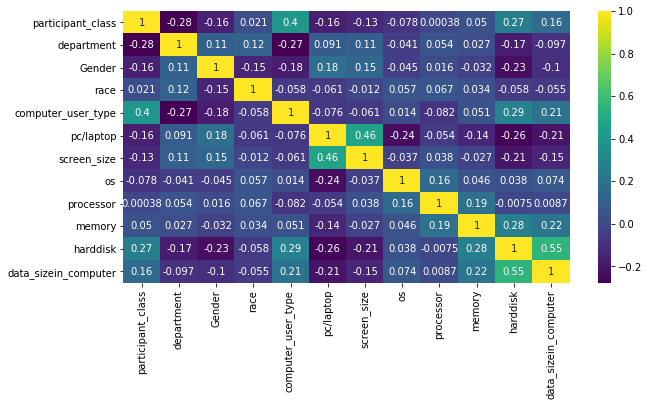

In [60]:
corr = data_1.corr()
#corr = new_df.corr()
print(corr.shape[0])
#cmap = sns.diverging_palette(230, 255, as_cmap=True)
plt.figure(figsize=(10,5))
sns.heatmap(data_1.corr(), cmap='viridis', annot= True)
plt.show()

# Dummy Creation

In [61]:
ownership_data = pd.get_dummies(data_1['computer_ownership'])
ownership_data.head(1)

,Other,Own,University property
14,0,1,0


In [62]:
new_df = pd.merge(data_1, ownership_data, right_index= True, left_index= True)
new_df.head()

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status,Other,Own,University property
14,6/18/2020 10:26,11,NaN,2,2,10,1,2,14,NaN,No,Built-in to my computer,Average,Apple Macbook Pro,Own,1,14,2,1,2,2,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone 8,No,NaN,NaN,Neutral,100 - 300 Mbps,Average,Complete,0,1,0
15,6/19/2020 14:42,4,NaN,3,4,1,2,3,15,NaN,No,Built-in to my computer,Average,Dell Inspiron 5000,Own,2,6,3,3,3,2,Yes,Both,WD,Google Drive,Weekly,Yes,No,Yes,No,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Neutral,< 100 Mbps,Good,Complete,0,1,0
16,6/22/2020 12:09,4,NaN,3,5,1,2,3,15,NaN,3 year,Built-in to my computer,Excellent,Other,Own,2,6,2,2,2,2,Yes,Cloud,NaN,Microsoft OneDrive,Other,Yes,Yes,Yes,Yes,Yes,iPhone,iPhone X Series,No,NaN,NaN,Moderately confident,300 - 500 Mbps,Excellent,Complete,0,1,0
17,6/22/2020 12:09,7,NaN,3,4,1,2,3,15,NaN,No,Built-in to my computer,Good,Other,Own,3,22,3,2,5,3,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,Google,Google Pixel 3a,No,NaN,NaN,Very confident,300 - 500 Mbps,Excellent,Complete,0,1,0
18,6/22/2020 12:08,4,NaN,4,5,2,1,3,13,NaN,No,Built-in to my computer,Good,Apple Macbook Air,Own,1,18,2,2,1,3,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone X Series,Yes,Apple Watch,Apple Watch 4,Somewhat confident,100 - 300 Mbps,Average,Complete,0,1,0


In [63]:
department_dummies = pd.get_dummies(data_1['department'], drop_first=True)

In [64]:
department_dummies.head(1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
new_df['dep_2'] = department_dummies.iloc[:, 0]
new_df['dep_3'] = department_dummies.iloc[:, 1]
new_df['dep_4'] = department_dummies.iloc[:, 2]
new_df['dep_5'] = department_dummies.iloc[:, 3]
new_df['dep_6'] = department_dummies.iloc[:, 4]
new_df['dep_7'] = department_dummies.iloc[:, 5]
new_df['dep_8'] = department_dummies.iloc[:, 6]
new_df['dep_9'] = department_dummies.iloc[:, 7]
new_df['dep_10'] = department_dummies.iloc[:, 8]
new_df['dep_11'] = department_dummies.iloc[:, 9]
new_df['dep_12'] = department_dummies.iloc[:, 10]
new_df['dep_13'] = department_dummies.iloc[:, 11]
new_df['dep_14'] = department_dummies.iloc[:, 12]
new_df['dep_15'] = department_dummies.iloc[:, 13]
new_df['dep_16'] = department_dummies.iloc[:, 14]
new_df['dep_17'] = department_dummies.iloc[:, 15]
new_df['dep_18'] = department_dummies.iloc[:, 16]
new_df['dep_19'] = department_dummies.iloc[:, 17]
new_df['dep_20'] = department_dummies.iloc[:, 18]

In [66]:
gender_dummies = pd.get_dummies(data_1['Gender'], drop_first=True)

In [67]:
gender_dummies.head(1)

,2,3,4,5
14,1,0,0,0


In [68]:
new_df['gen_2'] = gender_dummies.iloc[:, 0]
new_df['gen_3'] = gender_dummies.iloc[:, 1]
new_df['gen_4'] = gender_dummies.iloc[:, 2]
new_df['gen_5'] = gender_dummies.iloc[:, 3]


In [69]:
race_dummies = pd.get_dummies(data_1['race'], drop_first=True)
race_dummies.head(1)

,2,3,4,5,6,7,8,9,10
14,0,0,0,0,0,0,0,0,1


In [70]:
new_df['race_2'] = race_dummies.iloc[:, 0]
new_df['race_3'] = race_dummies.iloc[:, 1]
new_df['race_4'] = race_dummies.iloc[:, 2]
new_df['race_5'] = race_dummies.iloc[:, 3]
new_df['race_6'] = race_dummies.iloc[:, 4]
new_df['race_7'] = race_dummies.iloc[:, 5]
new_df['race_8'] = race_dummies.iloc[:, 6]
new_df['race_9'] = race_dummies.iloc[:, 7]
new_df['race_10'] = race_dummies.iloc[:, 8]


In [71]:
computer_user_dummies = pd.get_dummies(data_1['computer_user_type'])
computer_user_dummies.head(1)

,1,2
14,1,0


In [72]:
new_df['com_user_1'] = computer_user_dummies.iloc[:, 0]
new_df['com_user_2'] = computer_user_dummies.iloc[:, 1]


In [73]:
computer_dummies = pd.get_dummies(data_1['pc/laptop'])
computer_dummies.head(1)

,1,2,3
14,0,1,0


In [74]:
new_df['com_1'] = computer_dummies.iloc[:, 0]
new_df['com_2'] = computer_dummies.iloc[:, 1]
new_df['com_3'] = computer_dummies.iloc[:, 2]


In [75]:
new_df.head(1)

,survey_timestamp,participant_class,college,department,Gender,race,computer_user_type,pc/laptop,screen_size,screen_size_other,warranty,webcam,computer_rating,computer_model,computer_ownership,os,os_version,processor,memory,harddisk,data_sizein_computer,data_backup,backup_method,external_backup_disk_brand,cloud_brand,backup_freq,automatic_backup,loss_of_data,have-secondary_computer,secondary_primary_sync,have_smartphone,smartphone_brand,smartphone_model,have_smartwatch,smartwatch_brand,smartwatch_model,confidence_level_on_sw_installation,internet_speed,internet_connection_reliability,Completion_status,Other,Own,University property,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,gen_2,gen_3,gen_4,gen_5,race_2,race_3,race_4,race_5,race_6,race_7,race_8,race_9,race_10,com_user_1,com_user_2,com_1,com_2,com_3
14,6/18/2020 10:26,11,NaN,2,2,10,1,2,14,NaN,No,Built-in to my computer,Average,Apple Macbook Pro,Own,1,14,2,1,2,2,No,NaN,NaN,NaN,NaN,NaN,No,No,NaN,Yes,iPhone,iPhone 8,No,NaN,NaN,Neutral,100 - 300 Mbps,Average,Complete,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0


In [76]:
new_df_model = new_df[['participant_class', 'Other', 'Own', 'University property','dep_2','dep_3', 'dep_4','dep_5','dep_6','dep_7',
                 'dep_8','dep_9','dep_10','dep_11','dep_12','dep_13','dep_14','dep_15','dep_16','dep_17','dep_18','dep_19',
                 'dep_20','com_user_1','com_user_2','com_1','com_2','com_3','gen_2','gen_3','gen_4','gen_5','race_2','race_3','race_4','race_5','race_6','race_7','race_8','race_9',
                'race_10','os', 'processor', 'memory','harddisk']]

In [77]:
new_df_model.head()

,participant_class,Other,Own,University property,dep_2,dep_3,dep_4,dep_5,dep_6,dep_7,dep_8,dep_9,dep_10,dep_11,dep_12,dep_13,dep_14,dep_15,dep_16,dep_17,dep_18,dep_19,dep_20,com_user_1,com_user_2,com_1,com_2,com_3,gen_2,gen_3,gen_4,gen_5,race_2,race_3,race_4,race_5,race_6,race_7,race_8,race_9,race_10,os,processor,memory,harddisk
14,11,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,2
15,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,3,3
16,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,2,2
17,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,2,5
18,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,2,2,1


In [132]:
new_df_model.to_csv('new_df_data.csv', index= False)

In [79]:
new_df_model.os.mean()

1.7683823529411764

# Model creation

In [80]:
X = new_df_model.iloc[:,:-4].values
y = new_df_model.iloc[:, -4].values

In [81]:
X.shape

(1088, 41)

In [82]:
print(X)

[[11  0  1 ...  0  0  1]
 [ 4  0  1 ...  0  0  0]
 [ 4  0  1 ...  0  0  0]
 ...
 [ 1  0  1 ...  0  0  0]
 [16  0  0 ...  0  0  0]
 [ 1  0  1 ...  0  0  0]]


In [83]:
print(y)

[1 2 2 ... 2 2 2]


In [84]:
new_df_model.os.value_counts()

2    556
1    442
4     63
3     13
6      9
5      5
Name: os, dtype: int64

In [85]:
new_df_model.processor.value_counts()

2    421
3    342
4    136
5    130
1     59
Name: processor, dtype: int64

In [86]:
new_df_model.memory.value_counts()

2    432
3    324
4    128
1    127
5     77
Name: memory, dtype: int64

In [87]:
new_df_model.harddisk.value_counts()

1    390
2    293
3    177
4    161
5     67
Name: harddisk, dtype: int64

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)
#stratify=y. This tells train_test_split to make sure that the training and test datasets contain examples of each class in
#the same proportions as in the original dataset.

# Logistic Regression

In [131]:

log_regressor = LogisticRegression(C = 0.25, penalty= 'l1', solver= 'saga', max_iter=1000)
log_regressor.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_pred_test_log = log_regressor.predict(X_test)

In [91]:
#print(y_pred_test_log)

In [92]:
count_misclassified = (y_test != y_pred_test_log).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy_log = metrics.accuracy_score(y_test, y_pred_test_log)
print('Accuracy: {:.2f}'.format(accuracy_log))


Misclassified samples: 99
Accuracy: 0.55


In [93]:
accuracies1 = cross_val_score(estimator = log_regressor, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies1.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies1.std()*100))

Accuracy: 53.22 %
Standard Deviation: 2.08 %


In [133]:
cm = confusion_matrix(y_test, y_pred_test_log)
print(cm)
# print("Accuracy: : {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_knn)))
print(classification_report(y_test, y_pred_test_log))

[[48 40  0  0  0  0]
 [41 70  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 4  9  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  1]]
              precision    recall  f1-score   support

           1       0.52      0.55      0.53        88
           2       0.56      0.63      0.60       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2

    accuracy                           0.55       218
   macro avg       0.35      0.28      0.30       218
weighted avg       0.50      0.55      0.52       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
parameters = [{'penalty': ['l1', 'l2'], 'C': [0.25, 0.50, 0.75, 1.0], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                                                                 'saga'], 'max_iter': [100, 200, 300, 400, 500]}]
grid_search = GridSearchCV(estimator = log_regressor,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 55.63 %
Best Parameters: {'C': 0.25, 'max_iter': 400, 'penalty': 'l1', 'solver': 'saga'}


C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


# Random Forest

In [140]:
RFclassifier = RandomForestClassifier(criterion= 'entropy', max_features= 0.4, n_estimators= 300, random_state=1)
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [141]:
y_pred_test_rf = RFclassifier.predict(X_test)

In [142]:
#print(y_pred_test_rf)

In [143]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# accuracy_score(y_test, y_pred_test_rf)
cm = confusion_matrix(y_test, y_pred_test_knn)
print(cm)
print("Accuracy: : {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_rf)*100))
print(classification_report(y_test, y_pred_test_rf))

[[37 50  0  1  0  0]
 [35 74  1  1  0  0]
 [ 0  3  0  0  0  0]
 [ 9  4  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 2  0  0  0  0  0]]
Accuracy: : 51.83 %
              precision    recall  f1-score   support

           1       0.48      0.48      0.48        88
           2       0.56      0.61      0.59       111
           3       0.00      0.00      0.00         3
           4       0.33      0.08      0.12        13
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.52       218
   macro avg       0.40      0.36      0.36       218
weighted avg       0.51      0.52      0.51       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-fold cv

In [144]:
accuracies2 = cross_val_score(estimator = RFclassifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies2.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies2.std()*100))

Accuracy: 49.89 %
Standard Deviation: 0.59 %


## Grid search 

In [139]:
parameters = [{'n_estimators': [5, 10, 20, 50, 100, 300, 500, 1000], 'criterion': ['gini', 'entropy'],'max_features' : 
               ['auto', 'log2', 0.4,0.6, 0.8, 1.0]}]
grid_search = GridSearchCV(estimator = RFclassifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 49.89 %
Best Parameters: {'criterion': 'entropy', 'max_features': 0.4, 'n_estimators': 300}


In [99]:
# confusion_matrix(y_test, y_pred_test_rf)

array([[43, 43,  1,  1,  0,  0],
       [37, 71,  2,  1,  0,  0],
       [ 0,  3,  0,  0,  0,  0],
       [ 7,  5,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1]], dtype=int64)

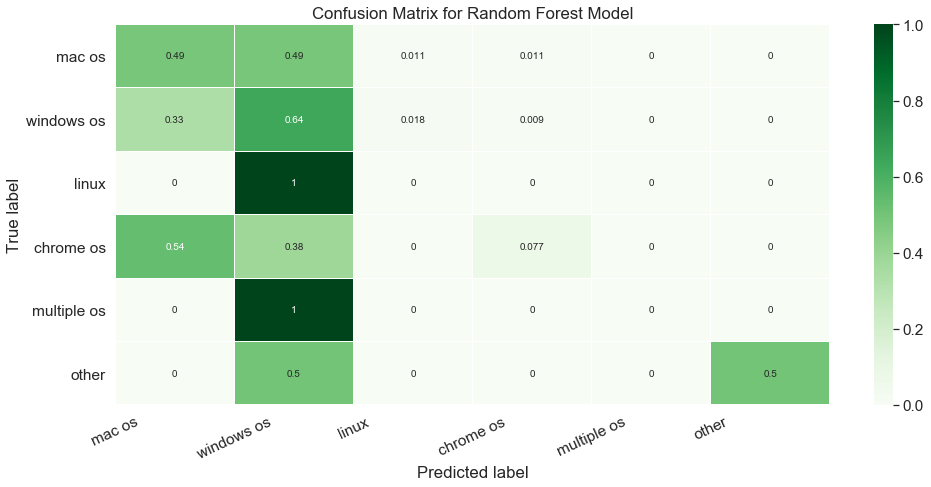

In [100]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test_rf)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['mac os', 'windows os', 'linux', 'chrome os','multiple os', 'other']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [101]:
# print(classification_report(y_test, y_pred_test_rf, zero_division = 'warn'))

              precision    recall  f1-score   support

           1       0.49      0.49      0.49        88
           2       0.57      0.64      0.60       111
           3       0.00      0.00      0.00         3
           4       0.33      0.08      0.12        13
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2

    accuracy                           0.53       218
   macro avg       0.40      0.28      0.31       218
weighted avg       0.52      0.53      0.52       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
set(y_test) - set(y_pred_test_rf)

{5}

# KNeighborsClassifier

In [151]:
knn = KNeighborsClassifier(n_neighbors= 216, weights= 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=216, p=2,
                     weights='distance')

In [152]:
y_pred_test_knn = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test_knn)
print(cm)
print("Accuracy: : {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_knn)))
print(classification_report(y_test, y_pred_test_knn))

[[37 50  0  1  0  0]
 [35 74  1  1  0  0]
 [ 0  3  0  0  0  0]
 [ 9  4  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 2  0  0  0  0  0]]
Accuracy: : 0.51 %
              precision    recall  f1-score   support

           1       0.45      0.42      0.43        88
           2       0.56      0.67      0.61       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.51       218
   macro avg       0.17      0.18      0.17       218
weighted avg       0.47      0.51      0.48       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-fold cv

In [147]:
accuracies3 = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies3.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies3.std()*100))

Accuracy: 48.16 %
Standard Deviation: 1.87 %


## Grid search 

In [108]:
parameters = [{'n_neighbors': [36, 45, 46, 55, 56, 115, 116, 215, 216, 250, 275, 276, 315, 316], 'weights': 
               ['uniform', 'distance']}]
grid_search = GridSearchCV(estimator = knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 53.68 %
Best Parameters: {'n_neighbors': 216, 'weights': 'distance'}


In [109]:
#Grid search

# Decision tree

In [156]:
decision_classifier = DecisionTreeClassifier(criterion = 'entropy', max_features=0.6, random_state = 0)
decision_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=0.6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [157]:
y_pred_test_decision = decision_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test_decision)
print(cm)
print("Accuracy: {:.2f} %".format(metrics.accuracy_score(y_test, y_pred_test_decision)))
print(classification_report(y_test, y_pred_test_decision))

[[46 39  1  2  0  0]
 [44 60  3  3  1  0]
 [ 1  2  0  0  0  0]
 [ 9  3  0  1  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  0  2]]
Accuracy: 0.50 %
              precision    recall  f1-score   support

           1       0.46      0.52      0.49        88
           2       0.57      0.54      0.56       111
           3       0.00      0.00      0.00         3
           4       0.17      0.08      0.11        13
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.50       218
   macro avg       0.37      0.36      0.36       218
weighted avg       0.50      0.50      0.50       218



## K-fold cv

In [158]:
accuracies4 = cross_val_score(estimator = decision_classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies4.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies4.std()*100))

Accuracy: 49.08 %
Standard Deviation: 1.55 %


## Grid search 

In [113]:
parameters = [{'criterion': ['gini', 'entropy'],'max_features' : ['auto', 'log2', 0.4,0.6, 0.8, 1.0]}]
grid_search = GridSearchCV(estimator = decision_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 49.08 %
Best Parameters: {'criterion': 'entropy', 'max_features': 0.6}


# XGBoost

In [114]:
# from xgboost import XGBClassifier
# xg_classifier = XGBClassifier()
# xg_classifier.fit(X_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

# SVM

In [167]:
from sklearn.svm import SVC
svm = SVC(C= 0.5, kernel = 'rbf', gamma= 0.6, random_state = 0)
svm.fit(X_train, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [168]:
y_pred_test_svm = svm.predict(X_test)

In [169]:
#from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_test_svm)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_svm))
print(classification_report(y_test, y_pred_test_svm))

[[30 58  0  0  0  0]
 [34 77  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 5  8  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  0  0]]
Accuracy:  0.4908256880733945
              precision    recall  f1-score   support

           1       0.43      0.34      0.38        88
           2       0.52      0.69      0.59       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.49       218
   macro avg       0.16      0.17      0.16       218
weighted avg       0.44      0.49      0.46       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-fold cross validation

In [170]:
accuracies5 = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 4)
print("Accuracy: {:.2f} %".format(accuracies5.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies5.std()*100))

Accuracy: 54.83 %
Standard Deviation: 2.97 %


## Grid search

In [166]:

parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 54.83 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


# Ensembling all of the above or combination of them

In [120]:
bagging1 = BaggingClassifier(base_estimator=decision_classifier, bootstrap=False, max_features= 0.5, n_estimators= 15, max_samples=0.6,
                             random_state=1)
bagging2 = BaggingClassifier(base_estimator=knn, bootstrap= False, bootstrap_features= False,max_features= 0.9, 
                             n_estimators= 30, max_samples=0.6,random_state = 1)

In [176]:
bagging1.fit(X_train, y_train)
bagging2.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=216, p=2,
                                                      weights='distance'),
                  bootstrap=False, bootstrap_features=False, max_features=0.9,
                  max_samples=0.6, n_estimators=30, n_jobs=None,
                  oob_score=False, random_state=1, verbose=0, warm_start=False)

In [177]:
y_pred_test_bagging1 = bagging1.predict(X_test)
y_pred_test_bagging2 = bagging2.predict(X_test)

In [178]:
cm = confusion_matrix(y_test, y_pred_test_bagging1)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_bagging1))
print(classification_report(y_test, y_pred_test_bagging1))

[[38 50  0  0  0  0]
 [36 74  0  0  1  0]
 [ 0  3  0  0  0  0]
 [ 6  7  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  0  0  1]]
Accuracy:  0.518348623853211
              precision    recall  f1-score   support

           1       0.47      0.43      0.45        88
           2       0.54      0.67      0.60       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2

    accuracy                           0.52       218
   macro avg       0.34      0.27      0.29       218
weighted avg       0.48      0.52      0.49       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [179]:
cm = confusion_matrix(y_test, y_pred_test_bagging2)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_bagging2))
print(classification_report(y_test, y_pred_test_bagging2))

[[36 50  0  2  0  0]
 [32 76  1  2  0  0]
 [ 0  3  0  0  0  0]
 [ 5  8  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 1  1  0  0  0  0]]
Accuracy:  0.5137614678899083
              precision    recall  f1-score   support

           1       0.49      0.41      0.44        88
           2       0.55      0.68      0.61       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.51       218
   macro avg       0.17      0.18      0.18       218
weighted avg       0.47      0.51      0.49       218



In [121]:
parameters = [{
 'bootstrap': [True, False],
 'bootstrap_features': [True, False],    
 'n_estimators': [15, 20, 25, 30, 35, 40],
 'max_samples' : [0.6, 0.8, 1.0],
 'max_features': [0.5,0.6,0.7,0.8,0.9,1.0]  
#  'base_estimator__bootstrap': [True, False],    
#  'base_estimator__n_estimators': [100, 200, 300, 500, 1000],
#  'base_estimator__max_features' : [0.6, 0.8, 1.0]
}]

In [122]:
grid_search = GridSearchCV(bagging1, 
                           param_grid=parameters, 
                           scoring = 'accuracy',
                           cv=3, n_jobs= -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 53.68 %
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.6, 'n_estimators': 15}


In [123]:
grid_search = GridSearchCV(bagging2, 
                           param_grid=parameters, 
                           scoring = 'accuracy',
                           cv=3, n_jobs= -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 53.91 %
Best Parameters: {'bootstrap': False, 'bootstrap_features': False, 'max_features': 0.9, 'max_samples': 0.6, 'n_estimators': 30}


In [124]:
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [decision_classifier, knn, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
#     print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
    print ("Accuracy: {:.2f} (+/- {:.2f}) [{}]".format(scores.mean(), scores.std(), label))

        
    clf.fit(X_train, y_train)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
#     plt.title(label)

# plt.show()

Accuracy: 0.49 (+/- 0.02) [Decision Tree]
Accuracy: 0.54 (+/- 0.02) [K-NN]
Accuracy: 0.51 (+/- 0.02) [Bagging Tree]
Accuracy: 0.54 (+/- 0.01) [Bagging K-NN]


<Figure size 720x576 with 0 Axes>

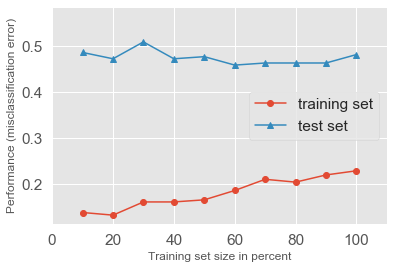

In [125]:
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [126]:
#Ensemble Size
# num_est = map(int, np.linspace(1,100,20))
# bg_clf_cv_mean = []
# bg_clf_cv_std = []
# for n_est in num_est:    
#     bg_clf = BaggingClassifier(base_estimator=decision_classifier, n_estimators=n_est, max_samples=0.8, max_features=0.8)
#     scores = cross_val_score(bg_clf, X_train, y_train, cv=3, scoring='accuracy')
#     bg_clf_cv_mean.append(scores.mean())
#     bg_clf_cv_std.append(scores.std())

In [ ]:
# plt.figure()
# (_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
# for cap in caps:
#     cap.set_markeredgewidth(1)                                                                                                                                
# plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
# plt.show()

# Stacking

In [127]:
from mlxtend.classifier import StackingClassifier

stacking_classifier = StackingClassifier(classifiers=[decision_classifier, RFclassifier, knn, svm], 
                          meta_classifier=log_regressor)
# from sklearn.ensemble import StackingClassifier

# stacking_classifier = StackingClassifier(estimators= [decision_classifier, RFclassifier, knn, svm], 
#                                          final_estimator= log_regressor,
#                                         cv = 3)

In [128]:
for clf, label in zip([decision_classifier, RFclassifier, knn, svm, stacking_classifier], 
                      ['Decision Tree',
                       'Random Forest',
                       'KNN', 
                       'SVM',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_train, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

Accuracy: 0.49 (+/- 0.02) [Decision Tree]
Accuracy: 0.49 (+/- 0.01) [Random Forest]
Accuracy: 0.54 (+/- 0.02) [KNN]
Accuracy: 0.55 (+/- 0.02) [SVM]
Accuracy: 0.51 (+/- 0.01) [StackingClassifier]


In [129]:
label = ['Decision Tree', 'Random Forest', 'K-NN', 'SVM', 'StackingClassifier']
clf_list = [decision_classifier, RFclassifier, knn, svm, stacking_classifier]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
#     print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
    print ("Accuracy: {:.2f} (+/- {:.2f}) [{}]".format(scores.mean(), scores.std(), label))

        
    clf.fit(X_train, y_train)
#     ax = plt.subplot(gs[grd[0], grd[1]])
#     fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
#     plt.title(label)

# plt.show()

Accuracy: 0.49 (+/- 0.02) [Decision Tree]
Accuracy: 0.49 (+/- 0.01) [Random Forest]
Accuracy: 0.54 (+/- 0.02) [K-NN]
Accuracy: 0.55 (+/- 0.02) [SVM]


<Figure size 720x576 with 0 Axes>

In [130]:
accuracies6 = cross_val_score(estimator = stacking_classifier, X = X_train, y = y_train, cv = 3)
print("Accuracy: {:.2f} %".format(accuracies6.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies6.std()*100))

Accuracy: 51.15 %
Standard Deviation: 0.71 %


In [180]:
stacking_classifier.fit(X_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=None,
                                                       max_features=0.6,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                            

In [181]:

y_pred_test_stacking = stacking_classifier.predict(X_test)

In [182]:
cm = confusion_matrix(y_test, y_pred_test_stacking)
print(cm)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred_test_stacking))
print(classification_report(y_test, y_pred_test_stacking))

[[40 47  0  1  0  0]
 [34 76  0  1  0  0]
 [ 0  3  0  0  0  0]
 [ 7  6  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  1  0  0]]
Accuracy:  0.5321100917431193
              precision    recall  f1-score   support

           1       0.49      0.45      0.47        88
           2       0.57      0.68      0.62       111
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2

    accuracy                           0.53       218
   macro avg       0.18      0.19      0.18       218
weighted avg       0.49      0.53      0.51       218



C:\Users\Imtiaz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
